Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [100]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [101]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("Movies.csv")


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [102]:
# dropping numerous irrelevant columns
movies_df.drop('keywords',axis=1, inplace=True)
movies_df.drop('homepage',axis=1, inplace=True)
movies_df.drop('tagline',axis=1, inplace=True)
movies_df.drop('original_language',axis=1, inplace=True)
movies_df.drop('overview',axis=1, inplace=True)
movies_df.drop('production_companies',axis=1, inplace=True)
movies_df.drop('original_title',axis=1, inplace=True)
movies_df.head(10)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman: Dawn of Justice,5.7,7004


#### Remove any duplicate rows

In [103]:
df = movies_df.drop_duplicates()

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [104]:
df = df[df.budget != 0]
df = df[df.revenue != 0]

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [105]:
# Change the release_date column to DateTime column
df['datetime'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
df['year'] = pd.DatetimeIndex(df['release_date']).year

# Drop row now there is no need for it
df.drop('release_date',axis=1, inplace=True)

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [106]:
df['budget'] = df['budget'].astype('int')
df['revenue'] = df['revenue'].astype('int')

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [107]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(df.index,df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

df.head()

,budget,genres,id,popularity,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,datetime,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",-1507002209,162.0,"['English', 'Español']",Released,Avatar,7.2,11800,2009-12-10,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],961000000,169.0,['English'],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,Spectre,6.3,4466,2015-10-26,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],1084939099,165.0,['English'],Released,The Dark Knight Rises,7.6,9106,2012-07-16,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],284139100,132.0,['English'],Released,John Carter,6.1,2124,2012-03-07,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [142]:
# Creating dataframe for most expensive movies
most_expensive = pd.DataFrame({'budget': df['budget'],
                               'revenue': df['revenue'],
                              'title': df['title']
                              })

# Sort by budget
most_expensive = most_expensive.sort_values(by='budget', ascending = False)

print('The 5 most expensive films are:')
most_expensive.head()

The 5 most expensive films are:


,budget,revenue,title
17,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides
1,300000000,961000000,Pirates of the Caribbean: At World's End
7,280000000,1405403694,Avengers: Age of Ultron
10,270000000,391081192,Superman Returns
4,260000000,284139100,John Carter


In [143]:
# The cheapest films will be last in the most expensive dataframe so we return that
print('The 5 cheapest films are:')
most_expensive.tail()

The 5 cheapest films are:


,budget,revenue,title
4608,8,16,The Prophecy
3372,7,5,Split Second
3419,7,7,Bran Nue Dae
3611,4,25,A Farewell to Arms
4238,1,8500000,Modern Times


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [110]:
df['profit'] = df['revenue'] - df['budget']

In [145]:
# Creating dataframe for profit
most_profit = pd.DataFrame({'budget': df['budget'],
                            'revenue': df['revenue'],
                            'profit': df['profit'],
                            'title': df['title']
                              })

# Sort by most
most_profit = most_profit.sort_values(by='profit', ascending = False)

print('The 5 most profitable films are:')
most_profit.head()

The 5 most profitable films are:


,budget,revenue,profit,title
25,200000000,1845034188,1645034188,Titanic
28,150000000,1513528810,1363528810,Jurassic World
44,190000000,1506249360,1316249360,Furious 7
16,220000000,1519557910,1299557910,The Avengers
7,280000000,1405403694,1125403694,Avengers: Age of Ultron


In [146]:
# Select lowest 5
print('The 5 least profitable films are:')
most_profit.tail()

The 5 least profitable films are:


,budget,revenue,profit,title
208,160000000,61698899,-98301101,The 13th Warrior
141,150000000,38992758,-111007242,Mars Needs Moms
338,145000000,25819961,-119180039,The Alamo
13,255000000,89289910,-165710090,The Lone Ranger
0,237000000,-1507002209,-1744002209,Avatar


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [113]:
# Creating popularity dataframe
popularity = pd.DataFrame({'vote_average': df['vote_average'],
                            'title': df['title'],
                          'popularity': df['popularity']})

# Sort by popularity
popularity = popularity.sort_values(by='popularity', ascending = False)

popularity

,vote_average,title,popularity
546,6.4,Minions,875.581305
95,8.1,Interstellar,724.247784
788,7.4,Deadpool,514.569956
94,7.9,Guardians of the Galaxy,481.098624
127,7.2,Mad Max: Fury Road,434.278564
...,...,...,...
4065,0.0,Mi America,0.039007
2970,8.5,There Goes My Baby,0.037073
3225,7.0,Limbo,0.034259
4105,5.0,"The Book of Mormon Movie, Volume 1: The Journey",0.031947


#### Find Movies which are rated above 7



In [114]:
# Create dataframe of title and vote average
ratings = df.groupby(by=['title'])

ratings = round(ratings.mean(),2)

ratings = pd.DataFrame({'vote_average': ratings['vote_average']
                            })

# Return dataframe with movies with a higher rating than 7
print(ratings.loc[ratings['vote_average'] >= 7.0])

                            vote_average
title                                   
(500) Days of Summer                 7.2
10 Things I Hate About You           7.3
12 Angry Men                         8.2
12 Years a Slave                     7.9
127 Hours                            7.0
...                                  ...
You Can't Take It With You           7.2
Young Frankenstein                   7.7
Zodiac                               7.3
Zombieland                           7.2
[REC]                                7.1

[768 rows x 1 columns]


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [147]:
# Create dataframe with year and sum of profit
year = df.groupby(by=['year'])

year = year.sum()

year = pd.DataFrame({'profit': year['profit']
                            })

year = year.sort_values(by='profit', ascending = False)

year.head(1)

,profit
year,
2014,1.702974e+10


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

<AxesSubplot:>

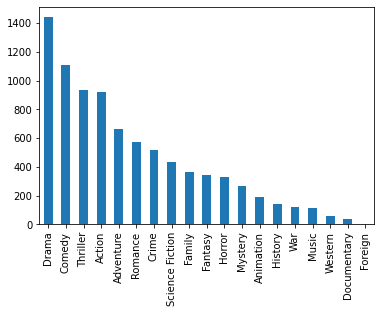

In [116]:
import ast

# get genre dataframe
genre = pd.DataFrame({'genres': df['genres']})

# create empty list to add each genre of every movie in
genres=[]

# loop through genres adding each genre to genres
for x in range(5000):
    try:
        for i in ast.literal_eval(genre['genres'][x]):
            genres.append(i)
    except:
        pass

# count frequency of each genre in array
genres = pd.Series(genres).value_counts()

genres.plot(kind='bar')


As we can see above dramas are the most popular genre

In [117]:
#### Generate three different interesting visualisations with a data story.
df.head()



,budget,genres,id,popularity,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,datetime,year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",-1507002209,162.0,"['English', 'Español']",Released,Avatar,7.2,11800,2009-12-10,2009,-1744002209
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],961000000,169.0,['English'],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007,661000000
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,Spectre,6.3,4466,2015-10-26,2015,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],1084939099,165.0,['English'],Released,The Dark Knight Rises,7.6,9106,2012-07-16,2012,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],284139100,132.0,['English'],Released,John Carter,6.1,2124,2012-03-07,2012,24139100


<AxesSubplot:>

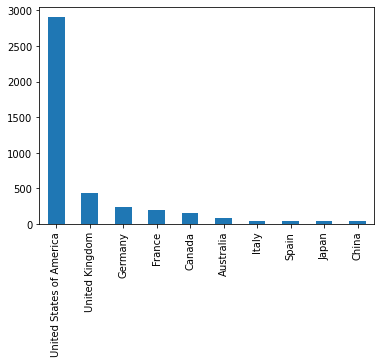

In [118]:
# find which country has the most production of movies

# get country dataframe
country = pd.DataFrame({'production_countries': df['production_countries']})

# create empty list to add each genre of every movie in
countries=[]

# loop through genres adding each genre to genres
for x in range(5000):
    try:
        for i in ast.literal_eval(country['production_countries'][x]):
            countries.append(i)
    except:
        pass

# count frequency of each genre in array
countries = (pd.Series(countries).value_counts()).head(10)

countries.plot(kind='bar')

The USA has by far produced the most movies with almost 3000

array([<AxesSubplot:ylabel='None'>], dtype=object)

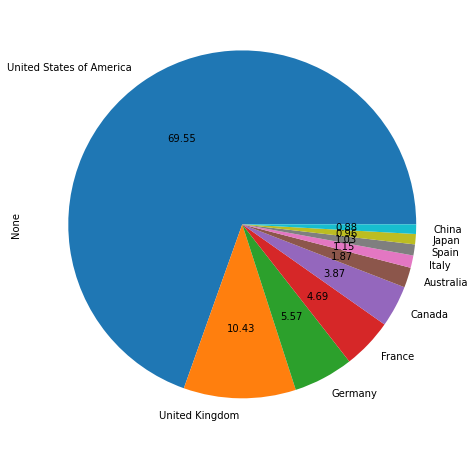

In [119]:
# what percentage of movies it that
countries.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')

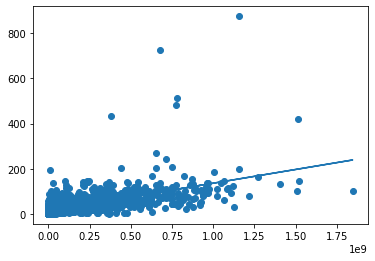

In [140]:
# does revenue affect popularity
title = pd.DataFrame({'popularity': df['popularity'],
                      'revenue': df['revenue']})

#rint(title['revenue'])

title.rename(columns={'Revenue': 'Popularity'}, inplace=True)


title=title.drop(0)

x =title['revenue']
y =title['popularity']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

According to the line of best fit the relationship between popularity and revenue is the higher the revenue the higher the popularity.

average popularity    22.27382
dtype: float64


<AxesSubplot:xlabel='year'>

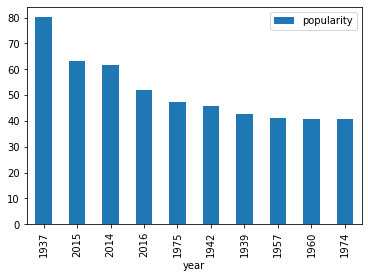

In [141]:
# what year has on average the most popular movies
group_year = df.groupby('year')

year = round(group_year.mean(),2)

year = year.sort_values(by='popularity', ascending = False)

year = pd.DataFrame({'popularity': year['popularity']})

print(f'average {year.mean()}')

year = year.head(10)

year.rename(columns={'Year': 'Popularity'}, inplace=True)

year.plot(kind='bar')

1937 has the highest average popularity which is probably due to there only being 1 or 2 movies from that year with moderate success raising the average. As expected the recent years 2014-16 are on average the most popular when disregarding the outlier year.

It has produced 69% of all the movies from the top 10 movie producttion countries. The UK in second has just produced 10% of them.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)